In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import pandas as pd
import statsmodels.api as sm
import matplotlib

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
 
from itertools import product
from tqdm import tqdm_notebook

import Model_Evaluation as me

In [3]:
#books = pd.read_csv('/Users/rahulnair/Desktop/Labelmaster_/Sales_Data/Books_ext_fs.csv')
#books = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LabelMaster/LabelMaster Data/Books_ext.csv')
books = pd.read_csv('C:/Users/11602/OneDrive/Practicum/LabelMaster_Sales_Forecasting/data/Books_ext_fs.csv')
sales = books[['Year_Month','Sum of Sales']]
sales['Sum of Sales'] = sales['Sum of Sales']/100000
sales

,Year_Month,Sum of Sales
0,2008-01,2.826041
1,2008-02,2.624744
2,2008-03,3.260597
3,2008-04,2.153875
4,2008-05,4.995599
...,...,...
150,2020-07,1.503481
151,2020-08,1.560669
152,2020-09,4.687110
153,2020-10,11.184468


In [4]:
books = books.dropna(axis = 1)
exog = books.iloc[:,2:]
exog

,"FTR Truck Loadings (000s, SA)_freight_m_trucking","FTR Active Truck Utilization (%, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking",Spot TL Rates (w/o FSC)_rates_m_trucking,Total LTL (w/o FSC)_rates_m_trucking,Total LTL (w/ FSC)_rates_m_trucking,Contract TL Tank Rates (w/o FSC)_rates_m_trucking,"OEM Net Orders (U.S. / CAN, units)_indicators_m_trucking",...,BUILD FOR_All_Other,Change in Distillate Fuel Inventories_x,Intermodal Revenue Movements (IANA-ETSO)_Total_x,FTR Intermodal Competitive Index_Intermodal Competitive Index (0=Neutral)_x,U.S. Origin Intermodal Volumes_International_x,Canada Origin Intermodal Volumes_Domestic_x,"N.A. Port Activity, Total TEUs_Exports_x","West Coast Port Activity, Total TEUs_Exports_x","Gulf Coast Port Activity, Total TEUs_Exports_x","Western Canadian Port Activity, Total TEUs_Exports_x"
0,57633.608984,88.294650,3940.638792,6915.782704,3013.868684,96.932289,99.755501,114.408275,99.995901,16185.0,...,969.0,-2981.0,1156094.0,3.341993,557011.0,46969.0,1.035742e+06,428531.270000,90322.590000,70230.000000
1,57175.659828,87.998407,3927.115595,6836.939472,2975.285847,99.719858,99.755501,114.867841,100.276486,11091.0,...,1104.0,-13327.0,1088826.0,2.285576,501961.0,44924.0,1.138045e+06,478707.330000,100410.660000,86567.000000
2,56814.700553,87.790155,3922.853376,6758.129439,2941.079313,103.347853,100.488998,117.070858,99.727612,14647.0,...,1158.0,-9852.0,1082825.0,1.924076,481100.0,46727.0,1.167742e+06,500866.450000,93384.280000,80451.000000
3,56916.813852,89.639867,3978.633479,6858.428982,2906.591249,111.718085,101.589242,122.811123,99.057287,14264.0,...,931.0,-733.0,1158286.0,5.986521,528843.0,53497.0,1.156788e+06,486063.840000,101642.940000,84739.000000
4,56194.246889,89.134818,3990.692209,6804.610846,2872.185063,117.525703,101.314181,123.968232,97.828232,12060.0,...,991.0,6890.0,1184144.0,7.940801,541259.0,53653.0,1.185090e+06,490618.980000,105424.640000,89548.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,61469.059874,89.962431,4379.187334,6571.127779,2639.040651,115.128696,102.231051,113.578198,115.191063,19213.0,...,1359.0,2134.0,1526490.0,-0.192121,513074.0,57503.0,1.095134e+06,393775.832112,125276.157772,103172.000000
151,62140.797176,90.641835,4404.415547,6601.260917,2676.666422,129.107598,104.339853,115.812566,114.911925,18302.0,...,1671.0,1353.0,1575928.0,0.625716,546740.0,56478.0,1.108304e+06,389408.103791,125319.157772,93979.000000
152,62170.174317,90.587889,4381.188114,6556.745680,2600.808117,136.100117,105.898533,117.464895,115.470202,28766.0,...,1711.0,-7196.0,1617044.0,5.475578,557748.0,59269.0,1.099329e+06,386298.700253,117576.128306,103129.000000
153,62870.759335,94.367218,4436.920215,6523.796564,2593.200335,140.122763,106.265281,117.793788,115.098017,36912.0,...,2018.0,-10130.4,1705714.0,9.817290,591616.0,60708.0,1.186353e+06,410614.677268,123604.184721,105255.000000


In [7]:
X_train, X_test, y_train, y_test = train_test_split(exog, sales, test_size=0.2, random_state=60616, shuffle=False)

In [22]:
X_train

,"FTR Truck Loadings (000s, SA)_freight_m_trucking","FTR Active Truck Utilization (%, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking",Spot TL Rates (w/o FSC)_rates_m_trucking,Total LTL (w/o FSC)_rates_m_trucking,Total LTL (w/ FSC)_rates_m_trucking,Contract TL Tank Rates (w/o FSC)_rates_m_trucking,"OEM Net Orders (U.S. / CAN, units)_indicators_m_trucking",...,BUILD FOR_All_Other,Change in Distillate Fuel Inventories_x,Intermodal Revenue Movements (IANA-ETSO)_Total_x,FTR Intermodal Competitive Index_Intermodal Competitive Index (0=Neutral)_x,U.S. Origin Intermodal Volumes_International_x,Canada Origin Intermodal Volumes_Domestic_x,"N.A. Port Activity, Total TEUs_Exports_x","West Coast Port Activity, Total TEUs_Exports_x","Gulf Coast Port Activity, Total TEUs_Exports_x","Western Canadian Port Activity, Total TEUs_Exports_x"
0,57633.608984,88.294650,3940.638792,6915.782704,3013.868684,96.932289,99.755501,114.408275,99.995901,16185.0,...,969.0,-2981.0,1156094.0,3.341993,557011.0,46969.0,1.035742e+06,428531.270000,90322.590000,70230.0
1,57175.659828,87.998407,3927.115595,6836.939472,2975.285847,99.719858,99.755501,114.867841,100.276486,11091.0,...,1104.0,-13327.0,1088826.0,2.285576,501961.0,44924.0,1.138045e+06,478707.330000,100410.660000,86567.0
2,56814.700553,87.790155,3922.853376,6758.129439,2941.079313,103.347853,100.488998,117.070858,99.727612,14647.0,...,1158.0,-9852.0,1082825.0,1.924076,481100.0,46727.0,1.167742e+06,500866.450000,93384.280000,80451.0
3,56916.813852,89.639867,3978.633479,6858.428982,2906.591249,111.718085,101.589242,122.811123,99.057287,14264.0,...,931.0,-733.0,1158286.0,5.986521,528843.0,53497.0,1.156788e+06,486063.840000,101642.940000,84739.0
4,56194.246889,89.134818,3990.692209,6804.610846,2872.185063,117.525703,101.314181,123.968232,97.828232,12060.0,...,991.0,6890.0,1184144.0,7.940801,541259.0,53653.0,1.185090e+06,490618.980000,105424.640000,89548.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,63845.567648,100.000000,4300.920341,6782.358969,2756.474338,125.723922,95.537897,109.953477,102.496394,34121.0,...,1252.0,12874.0,1494386.0,7.490237,541302.0,51532.0,1.248680e+06,452522.250710,120315.568350,112421.0
120,62481.333539,99.574337,4198.543869,6757.763690,2728.777041,134.927392,97.646699,112.348448,103.284606,46259.0,...,1622.0,-4445.0,1510375.0,10.803407,563413.0,54702.0,1.095652e+06,413828.791822,102683.655832,90612.0
121,64265.506174,99.927036,4336.354550,6835.728260,2787.211389,128.999609,96.454768,111.129638,104.754963,36934.0,...,1778.0,-2551.0,1457483.0,9.857087,531634.0,52833.0,1.181375e+06,439377.581413,119666.668298,95027.0
122,63600.542270,100.000000,4269.173251,6794.097771,2771.878285,129.602568,97.371638,112.372860,106.508046,43304.0,...,1799.0,-8187.0,1579389.0,10.795759,556719.0,61680.0,1.346849e+06,481287.364673,134949.251835,119331.0


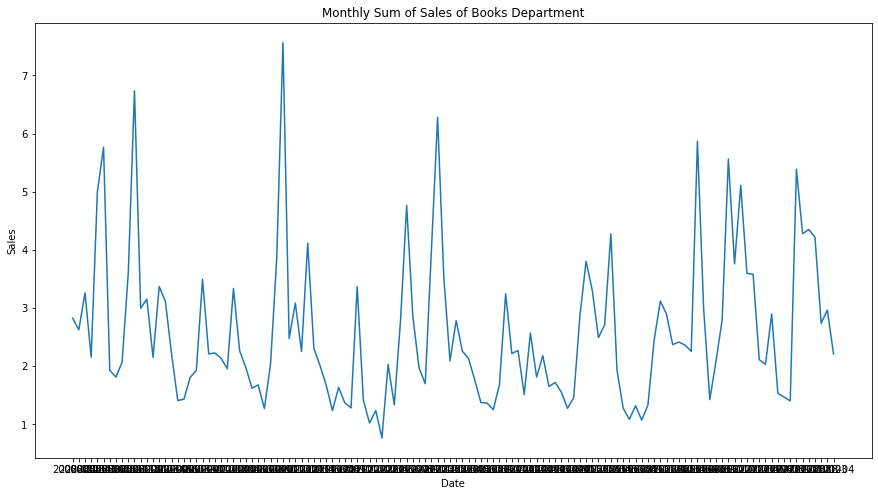

In [12]:
plt.figure(figsize=[15,8])
plt.plot(y_train['Year_Month'],y_train['Sum of Sales'])
plt.title('Monthly Sum of Sales of Books Department')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [13]:
ad_fuller_result = adfuller(y_train['Sum of Sales'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -7.223009219970894
p-value: 2.087562854046757e-10


Since the p-value is greater than 0.5, we cannot reject null hypothesis and must assume that the series is not stationary.

sales['sales_diffed'] = sales['Sum of Sales'].diff(1)
sales

ad_fuller_result = adfuller(sales['sales_diffed'][1:])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

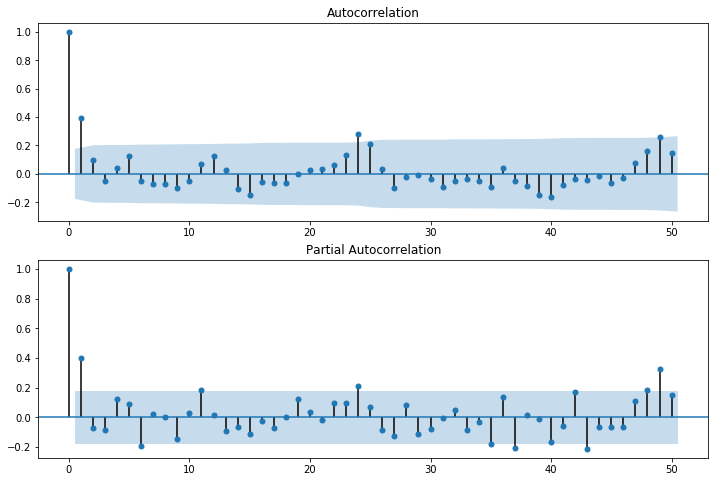

In [16]:
fig, ax = plt.subplots(2,1, figsize= (12,8))
fig = sm.graphics.tsa.plot_acf(y_train['Sum of Sales'], lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(y_train['Sum of Sales'], lags=50, ax=ax[1])
plt.show()

# New Section

In [17]:
p = range(0,4)
d = range(0,1)
q = range(0,4)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

df = pd.DataFrame()
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_train['Sum of Sales'],
                                            exog = X_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}- AIC:{}'.format(param, param_seasonal, results.aic))

            combo = [(param,param_seasonal,results.aic)]
            df = df.append(combo)
            print(" ")
        except:
            continue
df.columns = ['param','param_seasonal', 'AIC']

ARIMA(0, 0, 0)x(0, 0, 0, 12)- AIC:893.1422224846018
 
ARIMA(0, 0, 0)x(0, 0, 1, 12)- AIC:384.396667692265
 
ARIMA(0, 0, 0)x(0, 0, 2, 12)- AIC:369.0795877977409
 
ARIMA(0, 0, 0)x(0, 0, 3, 12)- AIC:2983.455152461281
 
ARIMA(0, 0, 0)x(1, 0, 0, 12)- AIC:386.11440510852935
 
ARIMA(0, 0, 0)x(1, 0, 1, 12)- AIC:387.417402783325
 
ARIMA(0, 0, 0)x(1, 0, 2, 12)- AIC:370.5972811694399
 
ARIMA(0, 0, 0)x(1, 0, 3, 12)- AIC:3648.873328078412
 
ARIMA(0, 0, 0)x(2, 0, 0, 12)- AIC:370.30035529907303
 
ARIMA(0, 0, 0)x(2, 0, 1, 12)- AIC:373.49921659239465
 
ARIMA(0, 0, 0)x(2, 0, 2, 12)- AIC:372.98255668706656
 
ARIMA(0, 0, 0)x(2, 0, 3, 12)- AIC:4350.803956442933
 
ARIMA(0, 0, 0)x(3, 0, 0, 12)- AIC:336.088983120678
 
ARIMA(0, 0, 0)x(3, 0, 1, 12)- AIC:337.95504703269546
 
ARIMA(0, 0, 0)x(3, 0, 2, 12)- AIC:345.306517264853
 
ARIMA(0, 0, 0)x(3, 0, 3, 12)- AIC:3606.1816328138175
 
ARIMA(0, 0, 1)x(0, 0, 0, 12)- AIC:418.3683522303033
 
ARIMA(0, 0, 1)x(0, 0, 1, 12)- AIC:382.4460046368557
 
ARIMA(0, 0, 1)x(0, 0, 2, 1

ARIMA(2, 0, 1)x(1, 0, 2, 12)- AIC:362.7393198543066
 
ARIMA(2, 0, 1)x(1, 0, 3, 12)- AIC:3672.174356091497
 
ARIMA(2, 0, 1)x(2, 0, 0, 12)- AIC:361.4586361034946
 
ARIMA(2, 0, 1)x(2, 0, 1, 12)- AIC:364.00313764477784
 
ARIMA(2, 0, 1)x(2, 0, 2, 12)- AIC:364.9026120737384
 
ARIMA(2, 0, 1)x(2, 0, 3, 12)- AIC:3677.8756443907387
 
ARIMA(2, 0, 1)x(3, 0, 0, 12)- AIC:331.765102836265
 
ARIMA(2, 0, 1)x(3, 0, 1, 12)- AIC:333.3130473630125
 
ARIMA(2, 0, 1)x(3, 0, 2, 12)- AIC:341.5736003960305
 
ARIMA(2, 0, 1)x(3, 0, 3, 12)- AIC:3621.389315992422
 
ARIMA(2, 0, 2)x(0, 0, 0, 12)- AIC:406.0300448154375
 
ARIMA(2, 0, 2)x(0, 0, 1, 12)- AIC:378.8649339347054
 
ARIMA(2, 0, 2)x(0, 0, 2, 12)- AIC:363.11284618232014
 
ARIMA(2, 0, 2)x(0, 0, 3, 12)- AIC:4062.1905504430565
 
ARIMA(2, 0, 2)x(1, 0, 0, 12)- AIC:380.56541556035603
 
ARIMA(2, 0, 2)x(1, 0, 1, 12)- AIC:381.7138316297114
 
ARIMA(2, 0, 2)x(1, 0, 2, 12)- AIC:364.6328965522828
 
ARIMA(2, 0, 2)x(1, 0, 3, 12)- AIC:3609.289447759741
 
ARIMA(2, 0, 2)x(2, 0, 0,

In [18]:
df = df.sort_values('AIC').reset_index(drop= True)
df

,param,param_seasonal,AIC
0,"(3, 0, 0)","(3, 0, 0, 12)",328.424883
1,"(3, 0, 0)","(3, 0, 1, 12)",330.295707
2,"(3, 0, 1)","(3, 0, 0, 12)",330.425519
3,"(2, 0, 0)","(3, 0, 0, 12)",331.061584
4,"(0, 0, 2)","(3, 0, 0, 12)",331.353046
...,...,...,...
251,"(2, 0, 2)","(0, 0, 3, 12)",4062.190550
252,"(3, 0, 2)","(1, 0, 3, 12)",4168.774788
253,"(3, 0, 2)","(2, 0, 3, 12)",4174.367241
254,"(0, 0, 0)","(2, 0, 3, 12)",4350.803956


The above output suggests that SARIMAX(3,0,0)(3,0,0,12) yields the lowest AIC value of 328.424883. Therefore we should consider this to be the optimal option.

In [25]:
mod = sm.tsa.statespace.SARIMAX(y_train['Sum of Sales'],
                                exog = X_train,
                                order=(3, 0, 0),
                                seasonal_order=(3, 0, 0, 12))
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                       Sum of Sales   No. Observations:                  124
Model:             SARIMAX(3, 0, 0)x(3, 0, 0, 12)   Log Likelihood                -131.380
Date:                            Fri, 26 Mar 2021   AIC                            416.759
Time:                                    16:00:53   BIC                            633.921
Sample:                                         0   HQIC                           504.975
                                            - 124                                         
Covariance Type:                              opg                                         
                                                                                                             coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

[2] Covariance matrix is singular or near-singular, with condition number 7.52e+17. Standard errors may be unstable.


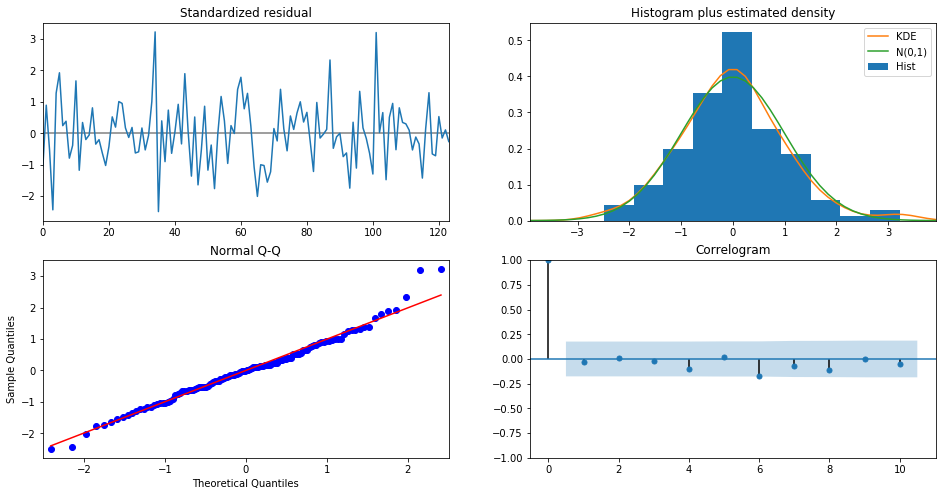

In [26]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Here we will forecast the values using the model. Can change starting point from which we need to forecast. For now we will keep starting point after 50 observations

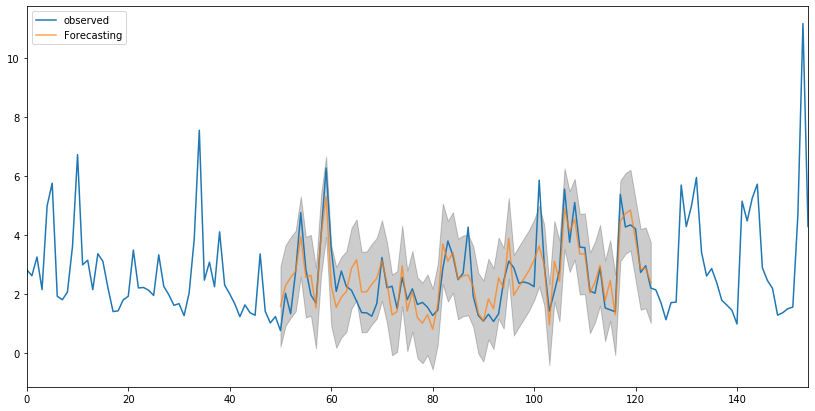

In [50]:
#Point from which prediction starts
start_point = 50
pred = results.get_prediction(start=start_point)
pred_ci = pred.conf_int()
ax = sales['Sum of Sales'].plot(label='observed',)
pred.predicted_mean.plot(ax=ax, label='Forecasting', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.legend()
plt.show()

In [58]:
results.forecast(steps=31,exog=X_test)

124    -0.055628
125     4.009858
126     1.513476
127     1.509030
128     0.086248
129    -0.290332
130    -1.747733
131    -1.019462
132    -1.299502
133    -1.837201
134    -2.075928
135    -0.622522
136    -0.979515
137    -1.121716
138    -0.299450
139    -0.135856
140     0.705350
141     1.479888
142     2.203871
143     1.776223
144     2.822278
145     1.969872
146    -4.628773
147   -31.728784
148     9.014104
149    16.887818
150    18.305363
151    14.705948
152    10.214072
153     9.809571
154    11.321323
dtype: float64

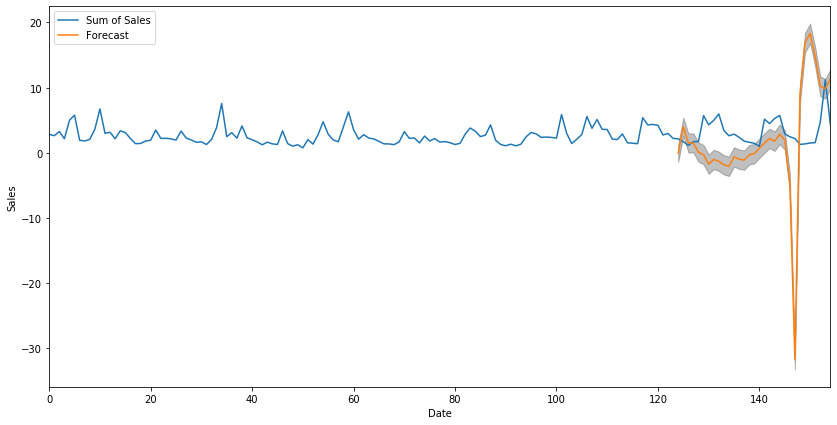

In [51]:
pred_uc = results.get_forecast(steps=31,exog=X_test)
pred_ci = pred_uc.conf_int()
ax = sales.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

# Model Evaluation
 - Mean Absolute Percentage Error
 - Mean Absolute Error
 - BIAS
 - Mean Squared Error
 - Root Mean Squared Error

In [59]:
predictions = pred.predicted_mean
actual = y_train['Sum of Sales'][start_point:]

In [60]:
me.evaluate_model(predictions,actual)

			Model Performance

Mean Absolute Percentage Error: 0.2390597578027457

Mean Absolute Error: 0.5124296178929674

BIAS: -0.011347725093903504

Mean Squared Error: 0.00952904399570374

Root Mean Squared Error: 0.09761682229873977


In [72]:
test_prediction = results.forecast(steps=31,exog=X_test)
test_prediction

124    -0.055628
125     4.009858
126     1.513476
127     1.509030
128     0.086248
129    -0.290332
130    -1.747733
131    -1.019462
132    -1.299502
133    -1.837201
134    -2.075928
135    -0.622522
136    -0.979515
137    -1.121716
138    -0.299450
139    -0.135856
140     0.705350
141     1.479888
142     2.203871
143     1.776223
144     2.822278
145     1.969872
146    -4.628773
147   -31.728784
148     9.014104
149    16.887818
150    18.305363
151    14.705948
152    10.214072
153     9.809571
154    11.321323
dtype: float64

In [73]:
test_actual = y_test['Sum of Sales']
test_actual

124     2.144722
125     1.712854
126     1.132139
127     1.711591
128     1.729007
129     5.702706
130     4.292626
131     4.973172
132     5.959677
133     3.427304
134     2.615216
135     2.867361
136     2.388626
137     1.790320
138     1.627745
139     1.452330
140     0.985878
141     5.154776
142     4.483683
143     5.255255
144     5.733124
145     2.894873
146     2.462465
147     2.193816
148     1.286718
149     1.367123
150     1.503481
151     1.560669
152     4.687110
153    11.184468
154     4.291668
Name: Sum of Sales, dtype: float64

In [71]:
me.evaluate_model(test_prediction,test_actual)

			Model Performance

Mean Absolute Percentage Error: 2.5725409578018668

Mean Absolute Error: 5.707774581425384

BIAS: 1.292922909776937

Mean Squared Error: 51.821139169407914

Root Mean Squared Error: 7.1986901009425255
